# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('advertising.csv')
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Feature Engineering

In [3]:
dataset.info()

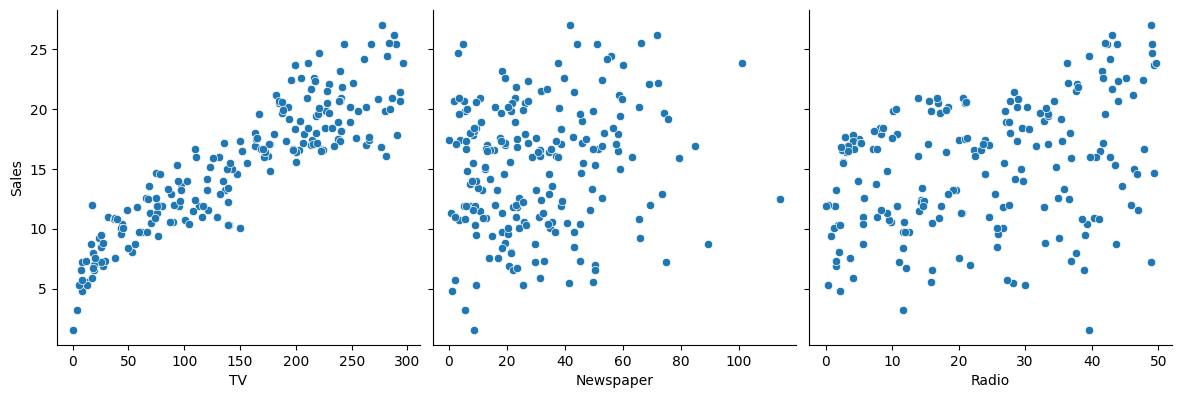

In [4]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(dataset, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', 
             height=4, aspect=1, kind='scatter')
plt.show()

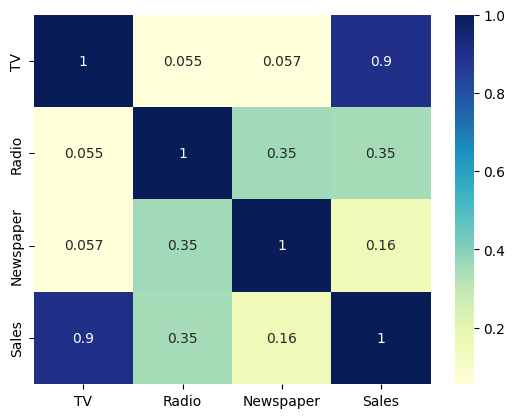

In [5]:
# Let's also see the correlation between the different variables.
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Looking at the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable. ####

## Feature Selection

In [6]:
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, -1].values

In [7]:
print(X)

In [8]:
print(y)

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [11]:
y_pred = regressor.predict(X_test)
y_pred

array([10.92912965,  9.88399105, 12.08313684, 22.93189318, 16.42699412,
       10.22148373,  7.63585439, 20.23195181,  8.45781235, 17.91849399,
       21.38595901, 11.90894708, 15.68668762, 17.38503783, 11.32105662,
       13.70527904, 21.62002651,  7.20037998, 11.22851831, 18.77855596,
       22.81758114, 14.7994085 , 16.6937222 , 14.33127351, 10.07451111,
       13.86313851, 16.17659633, 18.32130782, 19.35555956,  8.52857694,
       10.85292163, 17.98925858, 22.44198446, 20.3190467 ,  7.88080875,
        8.18019741, 10.40656035, 17.00399772, 10.88558221,  8.52313351])

## Visualising the Training set results

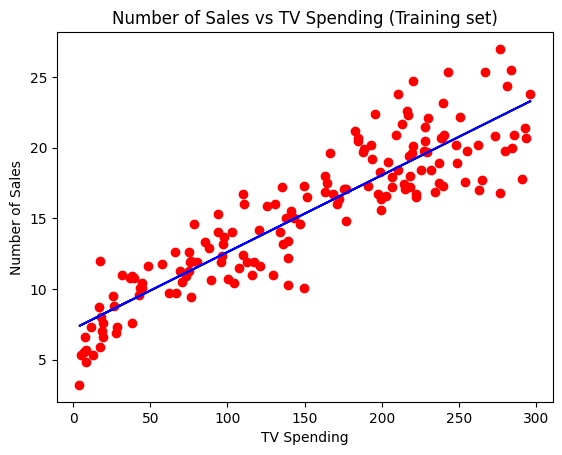

In [12]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Number of Sales vs TV Spending (Training set)')
plt.xlabel('TV Spending')
plt.ylabel('Number of Sales')
plt.show()

## Visualising the Test set results

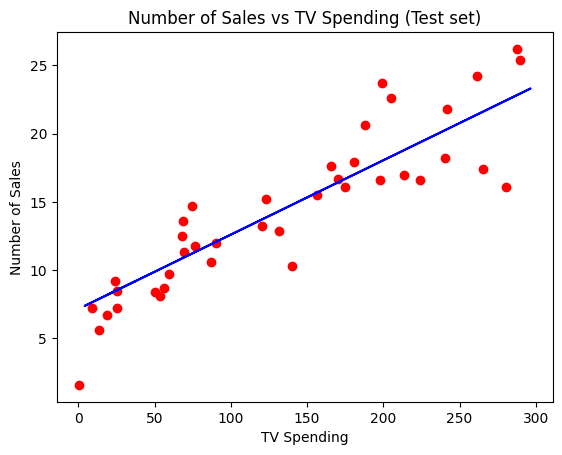

In [13]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Number of Sales vs TV Spending (Test set)')
plt.xlabel('TV Spending')
plt.ylabel('Number of Sales')
plt.show()

## Visualising the training set results together

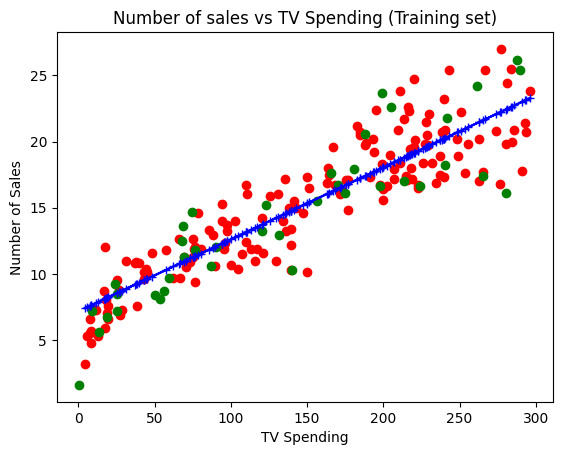

In [14]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue', marker = '+')
plt.scatter(X_test, y_test, color='green', marker = 'o')
plt.title('Number of sales vs TV Spending (Training set)')
plt.xlabel('TV Spending')
plt.ylabel('Number of Sales')
plt.show()

## Making a single prediction (for example the Sales revenue on 50 Dollar TV spend)

In [15]:
print(regressor.predict([[50]]))

[9.88399105]


Therefore, our model predicts that the Sales revenue of an Advertisement with 50 dollar spend is $ 9.88399105.

**Important note:** Notice that the value of the feature (50 dollar) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 50 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

## Getting the final linear regression equation with the values of the coefficients

In [41]:
print(regressor.coef_)
print(regressor.intercept_)

[0.0544343]
7.162275968528904
<function BaseEstimator.get_params at 0x00000231D76A9300>


## Building the linear regression model
### Performing Simple Linear Regression
### y = β0 + β1 * TV   
### where β0 is the intercept and  β1 values are called the model coefficients or model parameters.

Therefore, the equation of our simple linear regression model is:

$$\textrm{Sales Prediction} = 7.162276 + 0.0544343 \times \textrm{TV spending} $$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [22]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [23]:
lr.params

array([7.16227597, 0.0544343 ])

In [25]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.0
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           1.73e-59
Time:                        01:59:31   Log-Likelihood:                -353.74
No. Observations:                 160   AIC:                             711.5
Df Residuals:                     158   BIC:                             717.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1623      0.358     19.997      0.000       6.455       7.870
x1             0.0544      0.002     26.249      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.451   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.592
Skew:                           0.100   Prob(JB):                        0.744
Kurtosis:                       2.779   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.576643403065178

In [29]:
#Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.8010943934328407

In [27]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\Cynth\AppData\Local\Temp\ipykernel_27708\3003513444.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


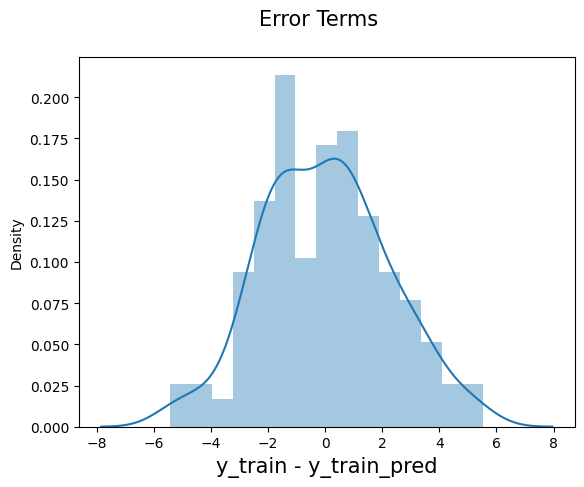

In [28]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()